### data analysis and exploration on crimes against on womens

In [4]:
# import libraries
import os 
import pandas as pd 
import numpy as np  
import plotly.express as px 
import plotly.graph_objects as go

### Define and cleates paths

In [6]:
#get working directories
current_dir = os.getcwd() 
#Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir) 
project_root_dir
# Define paths to the data folders
data_dir = os.path.join(project_root_dir, "Data")
raw_dir = os.path.join(data_dir, "raw")
processed_dir = os.path.join(data_dir, "processed")
# Define paths to results folder
results_dir = os.path.join(project_root_dir, "results")
#define paths to the docs folder
docs_dir = os.path.join(project_root_dir,"docs")

# Creates directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)


## Read data in the Data

In [8]:
crime_data_df= os.path.join(processed_dir, "reshaped_data.csv")
crime_df = pd.read_csv(crime_data_df)
crime_df.head(10)

,State,Year,Crime Type,Value
0,andhra pradesh,2001,No. of Rape cases,871
1,arunachal pradesh,2001,No. of Rape cases,33
2,assam,2001,No. of Rape cases,817
3,bihar,2001,No. of Rape cases,888
4,chhattisgarh,2001,No. of Rape cases,959
5,goa,2001,No. of Rape cases,12
6,gujarat,2001,No. of Rape cases,286
7,haryana,2001,No. of Rape cases,398
8,himachal pradesh,2001,No. of Rape cases,124
9,jammu & kashmir,2001,No. of Rape cases,169


#### Check the shape of the dataset and datatype

In [10]:
crime_df.shape

(5152, 4)

#### Summary Statistics 
numerical variables 

In [12]:
crime_df.describe()

,Year,Value
count,5152.000000,5152.000000
mean,2011.149457,944.821817
std,6.049927,2174.419490
min,2001.000000,0.000000
25%,2006.000000,4.000000
50%,2011.000000,79.500000
75%,2016.000000,814.250000
max,2021.000000,23278.000000


In [13]:
crime_df.describe(include='object')

,State,Crime Type
count,5152,5152
unique,37,7
top,andhra pradesh,No. of Rape cases
freq,147,736


In [14]:
crime_df['Crime Type'].value_counts()

Crime Type
No. of Rape cases                   736
Kidnap And Assault                  736
Dowry Deaths                        736
Assault against women               736
Assault against modesty of women    736
Domestic violence                   736
Women Trafficking                   736
Name: count, dtype: int64

In [15]:
crime_df['Crime Type'].value_counts(normalize=True)

Crime Type
No. of Rape cases                   0.142857
Kidnap And Assault                  0.142857
Dowry Deaths                        0.142857
Assault against women               0.142857
Assault against modesty of women    0.142857
Domestic violence                   0.142857
Women Trafficking                   0.142857
Name: proportion, dtype: float64

In [16]:
crime_df['State'].value_counts(normalize=True)

State
andhra pradesh       0.028533
uttar pradesh        0.028533
odisha               0.028533
punjab               0.028533
rajasthan            0.028533
sikkim               0.028533
tamil nadu           0.028533
tripura              0.028533
uttarakhand          0.028533
mizoram              0.028533
west bengal          0.028533
a & n islands        0.028533
chandigarh           0.028533
daman & diu          0.028533
lakshadweep          0.028533
puducherry           0.028533
arunachal pradesh    0.028533
nagaland             0.028533
meghalaya            0.028533
himachal pradesh     0.028533
assam                0.028533
bihar                0.028533
chhattisgarh         0.028533
goa                  0.028533
gujarat              0.028533
manipur              0.028533
haryana              0.028533
jammu & kashmir      0.028533
jharkhand            0.028533
karnataka            0.028533
kerala               0.028533
madhya pradesh       0.028533
maharashtra          0.028533
tela

In [17]:
crime_df['Value'].value_counts(normalize=True)

Value
0        0.161297
1        0.036102
2        0.024068
3        0.023098
4        0.016110
           ...   
375      0.000194
11649    0.000194
5907     0.000194
1534     0.000194
231      0.000194
Name: proportion, Length: 1759, dtype: float64

In [18]:
year = 2020 
crime_2020 = crime_df[crime_df['Year'] == year].groupby('Crime Type')['Value'].sum().reset_index()


### Crime  Type Distribution in 2020

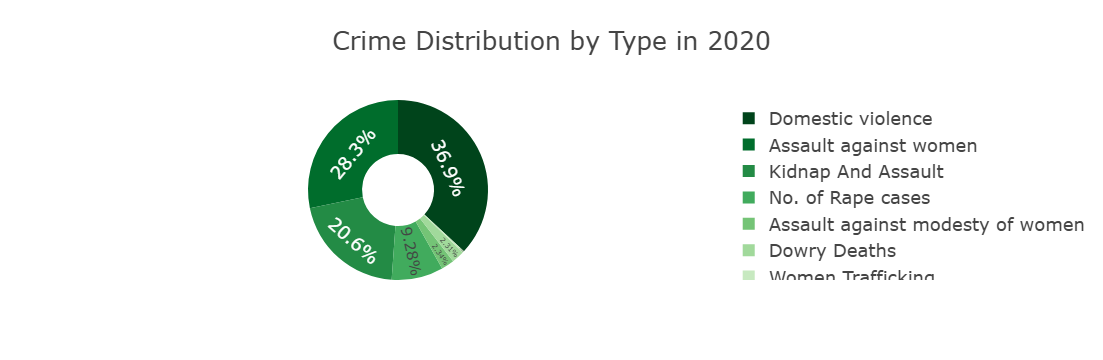

In [19]:
fig = px.pie(
    crime_2020,
    names='Crime Type',
    values='Value',
    title=f'Crime Distribution by Type in {year}',
    hole=0.4,
    template='presentation',
    color_discrete_sequence=px.colors.sequential.Greens_r
)

fig.update_traces(
    textinfo='percent',      
    textposition='inside',    
    hoverinfo='label+percent' 
)

fig.update_layout(
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.write_image(os.path.join(results_dir, 'pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'pie_chart.html'))
fig.show()


### Crime distribution in Top 5 states

In [20]:
top_5_states = crime_df.groupby('State')['Value'].sum().nlargest(5).reset_index()
crime_by_state = crime_df[crime_df['State'].isin(top_5_states['State'])]
crime_by_state = crime_by_state.groupby(['State', 'Crime Type'])['Value'].sum().reset_index()
state_order = top_5_states['State'].tolist()
crime_by_state['State'] = pd.Categorical(crime_by_state['State'], categories=state_order, ordered=True)
crime_by_state = crime_by_state.sort_values('State')

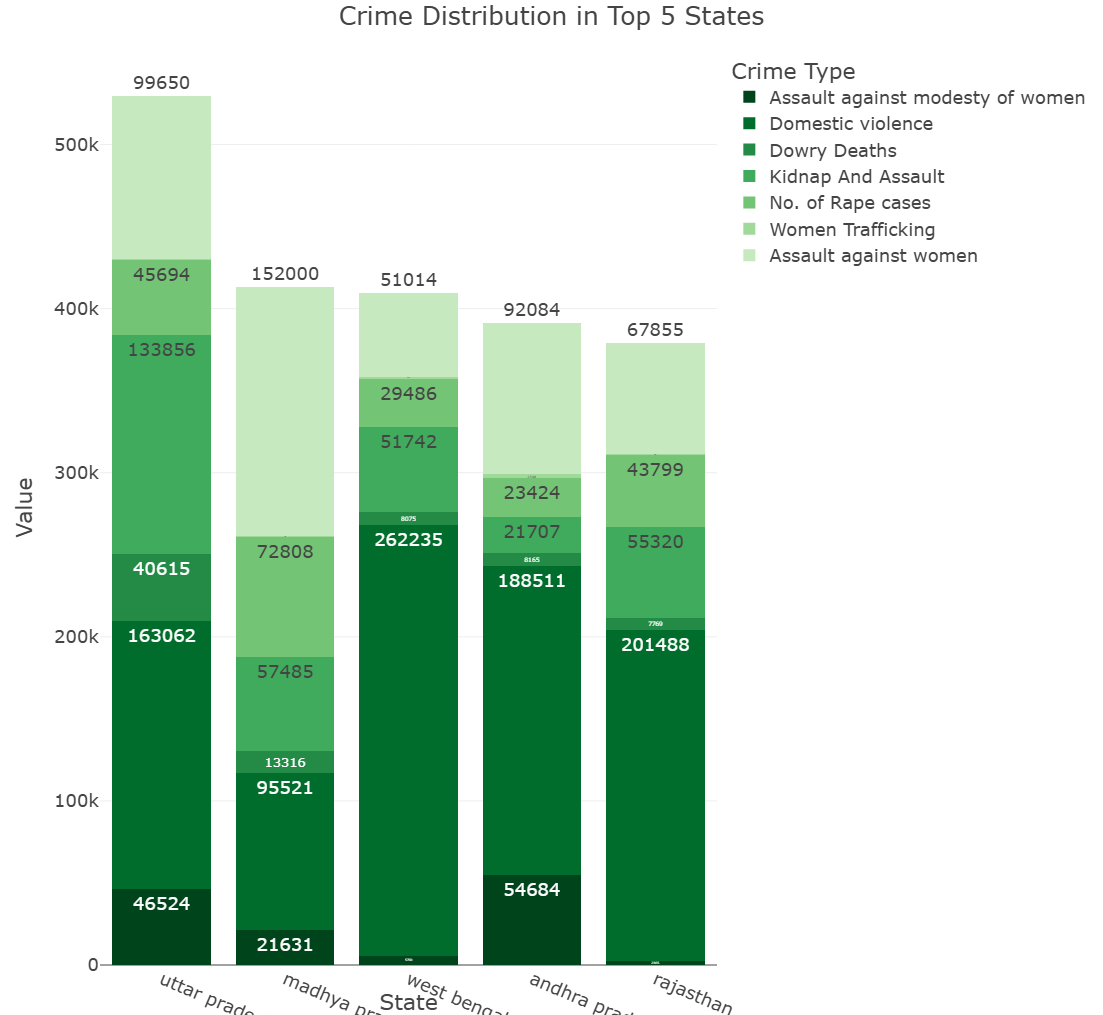

In [21]:
fig = px.bar(
    crime_by_state,
    x='State',
    y='Value',
    color='Crime Type',
    title='Crime Distribution in Top 5 States',
    barmode='stack',
    text='Value',
    height=1000,
    width=1200,
    template='presentation', 
    color_discrete_sequence=px.colors.sequential.Greens_r
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=23,
    margin=dict(l=100, r=50, t=50, b=50)
)
fig.write_image(os.path.join(results_dir, 'Top5_most_reported_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'Top5_most_reported_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'Top5_most_reported_bar_plot.html'))
fig.show()


### Crime trends over years

In [22]:
crime_over_years = crime_df.groupby(['Year', 'Crime Type'])['Value'].sum().reset_index().sort_values(['Year', 'Crime Type'])

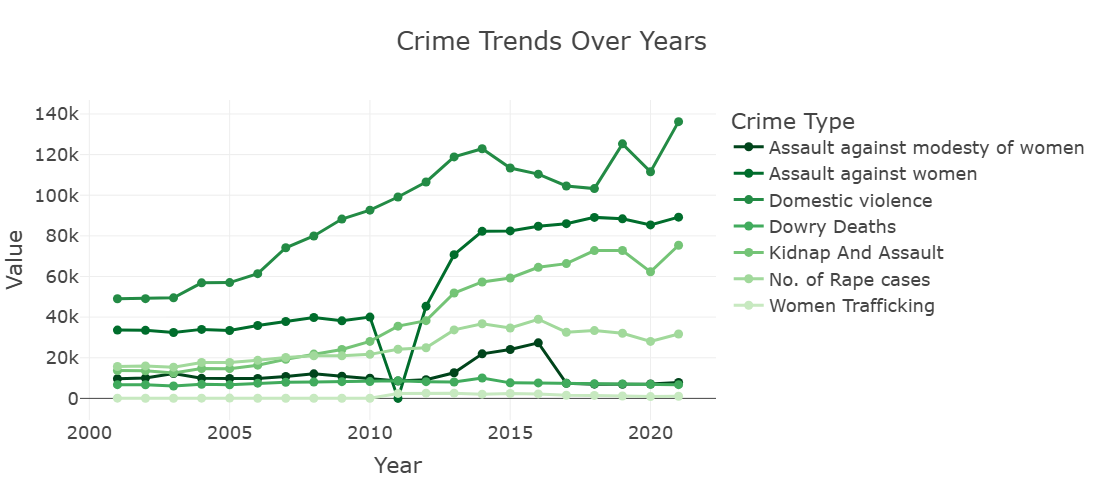

In [23]:
fig2 = px.line(
    crime_over_years,
    x='Year',
    y='Value',
    color='Crime Type',
    markers=True,
    title='Crime Trends Over Years',
    width=900,
    height=500,                                 
    template='presentation',                    
    color_discrete_sequence=px.colors.sequential.Greens_r
)

fig2.update_traces(mode='lines+markers')
fig2.update_layout(
    xaxis_tickangle=0,
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig2.write_image(os.path.join(results_dir, 'crime_trends_over_years.jpg'))
fig2.write_image(os.path.join(results_dir, 'crime_trends_over_years.png'))
fig2.write_html(os.path.join(results_dir, 'crime_trends_over_years.html'))

fig2.show()


### Top 3 Crime trends over the year

In [24]:
top_3_crimes = crime_df.groupby('Crime Type')['Value'].sum().nlargest(3).index.tolist()
crime_trend_top3 = crime_df[crime_df['Crime Type'].isin(top_3_crimes)]
crime_trend_by_year = crime_trend_top3.groupby(['Year', 'Crime Type'])['Value'].sum().reset_index()

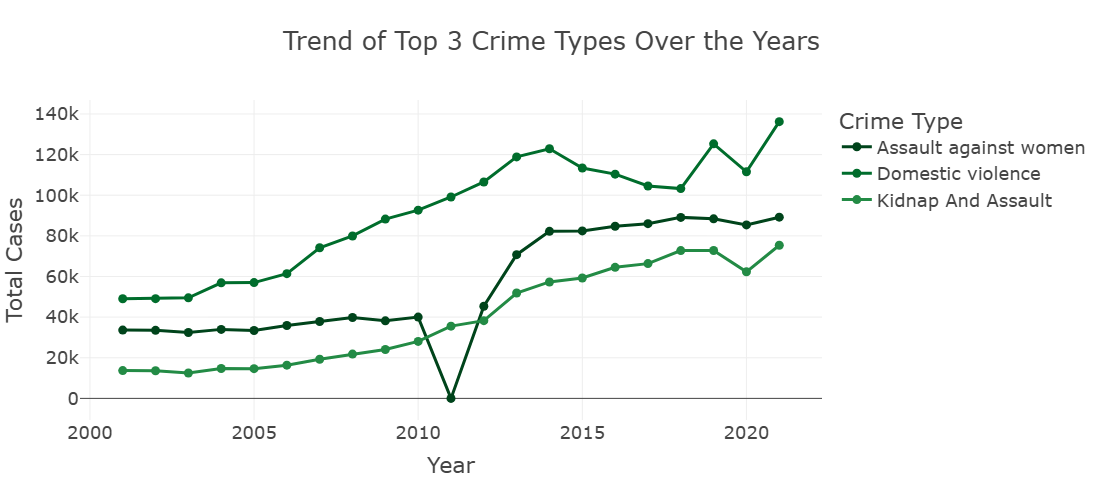

In [25]:
fig = px.line(
    crime_trend_by_year,
    x='Year',
    y='Value',
    color='Crime Type',
    markers=True,
    title='Trend of Top 3 Crime Types Over the Years',
    labels={'Value': 'Total Cases'},
    height=500,
    width=900,                 
    template='presentation',
    color_discrete_sequence=px.colors.sequential.Greens_r
)
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_tickangle=0,
    paper_bgcolor="rgba(9,0,8,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    legend_title_text='Crime Type'
)

fig.write_image(os.path.join(results_dir, 'top3_crime_trends_over_years.jpg'))
fig.write_image(os.path.join(results_dir, 'top3_crime_trends_over_years.png'))
fig.write_html(os.path.join(results_dir, 'top3_crime_trends_over_years.html'))

fig.show()


#### Top 10 Most Reported Crime Types

In [26]:
top_crimes = crime_df.groupby('Crime Type')['Value'].sum().nlargest(10).reset_index()

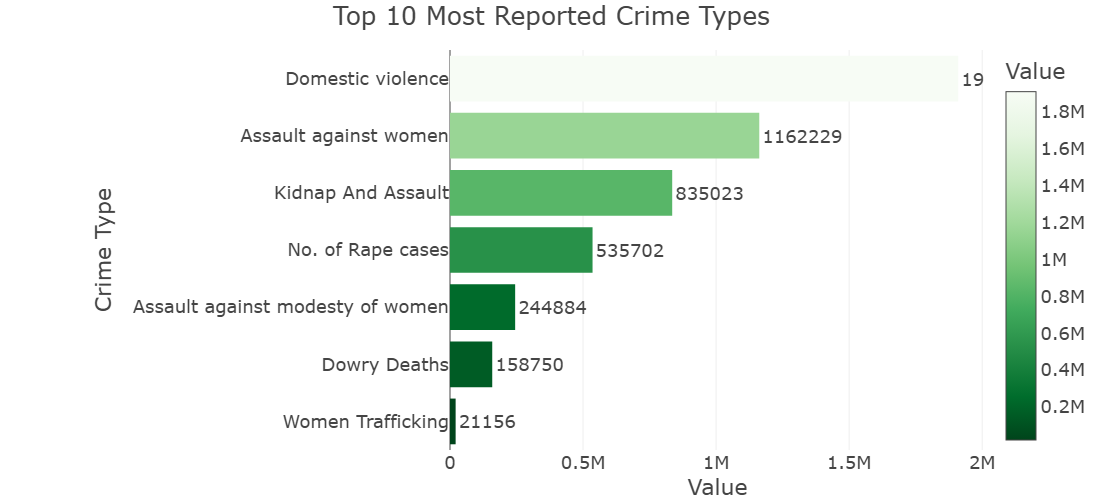

In [56]:
fig = px.bar(
    top_crimes,
    x='Value',
    y='Crime Type',
    orientation='h',  
    title='Top 10 Most Reported Crime Types ',
    text='Value',
    color='Value',
    color_continuous_scale=px.colors.sequential.Greens_r,
    height=500,
    width=900,
    template='presentation'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    margin=dict(l=450, r=50, t=50, b=50)  
)

fig.write_image(os.path.join(results_dir, 'Top10_most_reported_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'Top10_most_reported_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'Top10_most_reported_bar_plot.html'))

fig.show()
